In [4]:
import numpy as np

np.random.seed(42)

n = 100

x = np.linspace(-1,1,n)
y = 1/(1+25*x**2) 
y = y.reshape(n,1) 
y_noise = y + np.random.normal(0,0.1)


def MSE(y, y_pred):
    return np.mean((y - y_pred)**2)

def R2(y, y_pred):
    return 1 - (np.sum((y - y_pred)**2) / np.sum((y - np.mean(y))**2))

def polynomial_features(x, p, intercept=False):
    n = len(x)
    k = 0
    if intercept:
        X = np.zeros((n, p + 1))
        X[:, 0] = 1
        k += 1
    else:
        X = np.zeros((n, p))

    for i in range(1, p +1):
        X[:, i + k-1] = x**i 
    return X



## Part b : Ridge Regression for the Runge Function
Write your own code for the Ridge method as done in the previous exercise. The lecture notes from
week 35 and 36 contain more information. Furthermore, the results from the exercise set from week
36 is something you can reuse here.
Perform the same analysis as you did in the previous exercise but now for different values of λ.
Compare and analyze your results with those obtained in part a) with the OLS method. Study the
dependence on λ.

In [5]:
def Ridge_parameters(X, y, training_parameter=1.0):
    # Assumes X is scaled and has no intercept column
    return np.linalg.inv(X.T @ X + training_parameter * np.identity(len(X.T))) @ X.T @ y

Do this analysis with different parameters for $\lambda$

Plot saved as Combined_Analysis_3_Plots.png


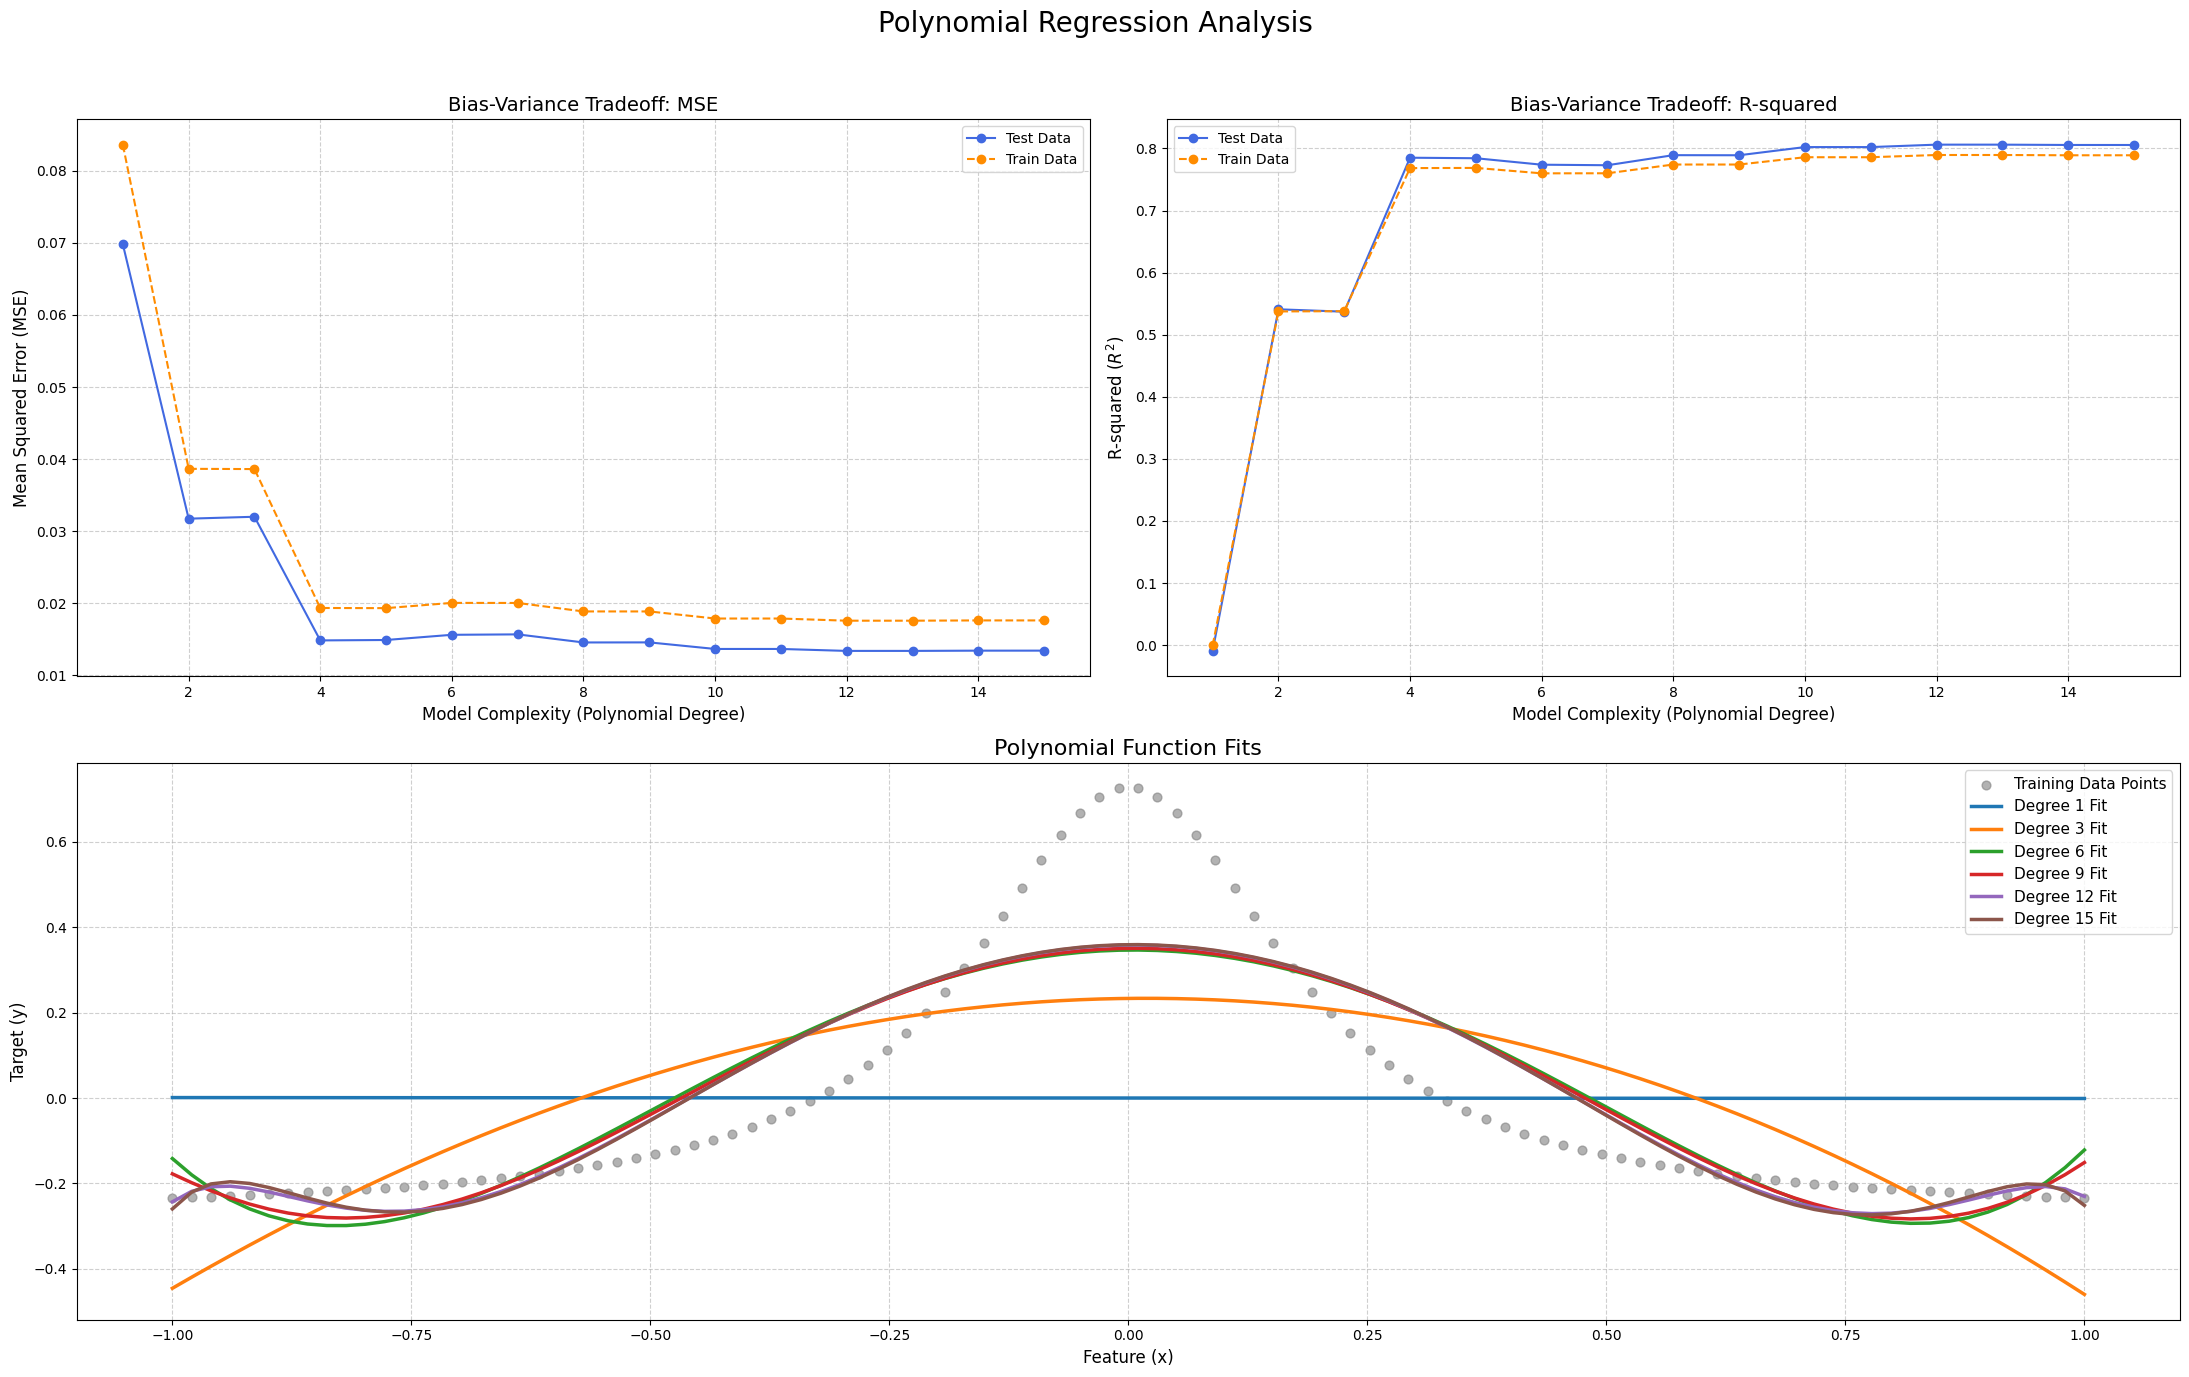

Plot saved as OLS_BiasVariance_SideBySide.png


<Figure size 640x480 with 0 Axes>

In [7]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

plot_predict = {"mse" :[],
                "r2" : []}
plot_train = {"mse":[],
              "r2": []}
beta_norms = []
degrees = np.arange(1, 16)

y_centered = y - y.mean() 

for degree in degrees:
    X = polynomial_features(x, degree)
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y_centered, test_size=0.2, random_state=57)
    


    beta = Ridge_parameters(X_train, y_train)
    beta_norms.append(beta)

    y_pred = X_test @ beta
    y_train_pred = X_train @ beta
    mse_predict = MSE(y_test, y_pred)
    mse_train = MSE(y_train, y_train_pred)
    r2_predict = R2(y_test, y_pred)
    r2_train = R2(y_train, y_train_pred)
    
    plot_predict["mse"].append(mse_predict)
    plot_predict["r2"].append(r2_predict)
    plot_train["mse"].append(mse_train)
    plot_train["r2"].append(r2_train)

fig = plt.figure(figsize=(22, 14))
gs = gridspec.GridSpec(2, 2)
fig.suptitle('Polynomial Regression Analysis', fontsize=20)

ax1 = fig.add_subplot(gs[0, 0]) 
ax2 = fig.add_subplot(gs[0, 1]) 
ax3 = fig.add_subplot(gs[1, :]) 

ax1.plot(degrees, plot_predict["mse"], label="Test Data", marker='o', color='royalblue')
ax1.plot(degrees, plot_train["mse"], label="Train Data", marker='o', linestyle='--', color='darkorange')
ax1.set_xlabel("Model Complexity (Polynomial Degree)", fontsize=12)
ax1.set_ylabel("Mean Squared Error (MSE)", fontsize=12)
ax1.set_title("Bias-Variance Tradeoff: MSE", fontsize=14)
ax1.legend()
ax1.grid(True, linestyle='--', alpha=0.6)
# Set a y-limit to keep the plot readable, as MSE can explode for high degrees


# --- Plot 2: R-squared (on the second axis, ax2) ---
ax2.plot(degrees, plot_predict["r2"], label="Test Data", marker='o', color='royalblue')
ax2.plot(degrees, plot_train["r2"], label="Train Data", marker='o', linestyle='--', color='darkorange')
ax2.set_xlabel("Model Complexity (Polynomial Degree)", fontsize=12)
ax2.set_ylabel("R-squared ($R^2$)", fontsize=12)
ax2.set_title("Bias-Variance Tradeoff: R-squared", fontsize=14)
ax2.legend()
ax2.grid(True, linestyle='--', alpha=0.6)
# R2 is bounded by 1, negative values indicate a very poor fit


ax3.scatter(x, y_centered, label='Training Data Points', color='gray', alpha=0.6, s=40)


plotted_degrees = [1, 3, 6, 9, 12, 15]

for degree in plotted_degrees:
    X_full = polynomial_features(x, degree)
    scaler = StandardScaler()
    X_full_scaled = scaler.fit_transform(X_full)
    y_pred = X_full_scaled @ beta_norms[degree - 1]
    
    ax3.plot(x, y_pred, label=f'Degree {degree} Fit', linewidth=2.5)

ax3.set_xlabel("Feature (x)", fontsize=12)
ax3.set_ylabel("Target (y)", fontsize=12)
ax3.set_title("Polynomial Function Fits", fontsize=16)
ax3.legend(fontsize=11)
ax3.grid(True, linestyle='--', alpha=0.6)


# --- Save and show the final combined plot ---
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig("Combined_Analysis_3_Plots.png")
print("Plot saved as Combined_Analysis_3_Plots.png")
plt.show()

# Adjust layout to prevent titles/labels from overlapping
plt.tight_layout()

# Save the figure to a file and display it
plt.savefig("OLS_BiasVariance_SideBySide.png")
print("Plot saved as OLS_BiasVariance_SideBySide.png")
plt.show()